In [1]:
car_img_path = "car1.jpeg"

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

C:\Users\my\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\my\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\my\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\my\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
def read_img(path, grayscale=True):
    img = cv2.imread(path)
    if grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img,cmap="gray")
        return img
    plt.imshow(img)
    return img

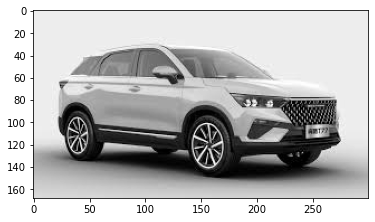

In [4]:
car = read_img(car_img_path)

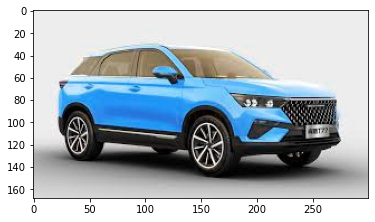

In [5]:
color_car = read_img(car_img_path, grayscale=False)

In [6]:
car.shape

(168, 300)

In [7]:
color_car.shape

(168, 300, 3)

In [8]:
# (1,r,c,1)
row,col = car.shape
car = car.reshape(1,row,col,1) # grayscale
# color_car = color_car.reshape(1,row,col,3) # colored
car.shape

(1, 168, 300, 1)

In [9]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 166, 298, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [10]:
3*3 + 1

10

In [11]:
out = conv_model.predict(car)

In [12]:
out.shape

(1, 166, 298, 1)

In [13]:
(168 - 3 + 0)//1 + 1

166

In [14]:
(300 - 3 + 0)//1 + 1


298

In [15]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

In [17]:
reshape_out.shape

(166, 298)

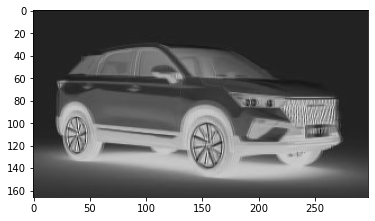

In [18]:
plt.imshow(reshape_out, cmap="gray")

## For color image

In [18]:
# (1,r,c,1)
row,col,depth = color_car.shape
# car = car.reshape(1,row,col,1) # grayscale
color_car = color_car.reshape(1,row,col,depth) # colored
color_car.shape

(1, 168, 300, 3)

In [19]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 166, 298, 1)       28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [20]:
3*3*3 + 1

28

In [21]:
out = conv_model.predict(color_car)

In [22]:
out.shape

(1, 166, 298, 1)

In [23]:
(168 - 3 + 0)//1 + 1

166

In [24]:
(300 - 3 + 0)//1 + 1


298

In [25]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

In [26]:
reshape_out.shape

(166, 298)

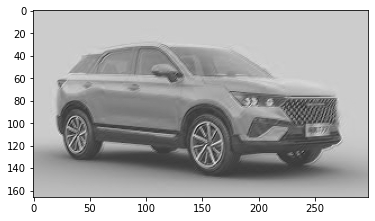

In [27]:
plt.imshow(reshape_out, cmap="gray")

# TRY TO DISPLAY OUTPUT FOR 5 FILTERS

In [19]:
def reshaping_in(img, grayscale=True):    
    if grayscale:
        row,col = img.shape
        img = img.reshape(1,row,col,1) # grayscale
        return img
    row,col,depth = img.shape
    color_img = img.reshape(1,row,col,depth) # colored
    return color_img

def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
    CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters, 
                                      kernel_size=filter_size, 
                                      strides=(1,1),
                                      input_shape=input_shape, 
                                      padding=padding)]

    conv_model = tf.keras.Sequential(CONV_LAYER)
    conv_model.summary()
    return conv_model

def apply_conv_model_and_visualize(img, conv_model):
    try:
        out = conv_model.predict(img)
        print(out.shape)
        row, col, depth = out.shape[1:]
        reshape_out = out.reshape(row, col, depth)

        for d in range(depth):
            plt.imshow(reshape_out[:,:,d], cmap="gray")
            plt.show()

    except Exception as e:
        raise e

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 166, 298, 1)       28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)


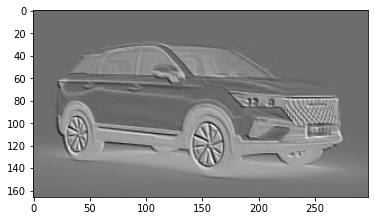

In [20]:
img = read_img(car_img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 166, 298, 10)      280       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 10)


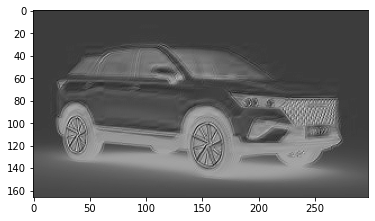

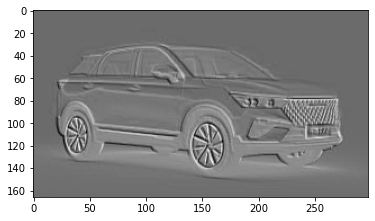

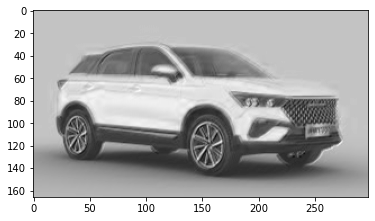

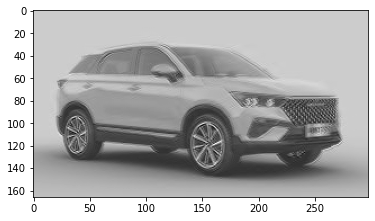

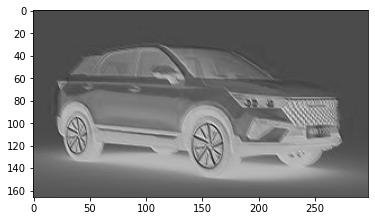

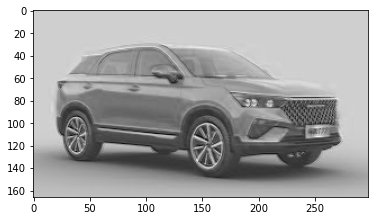

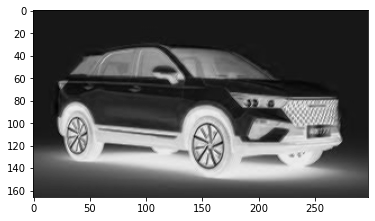

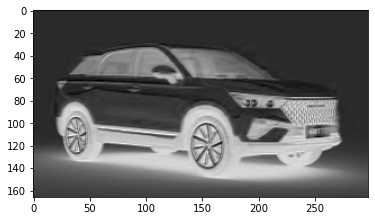

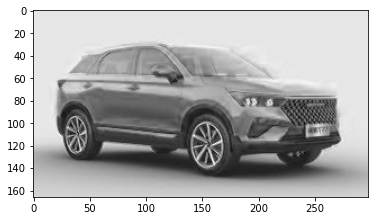

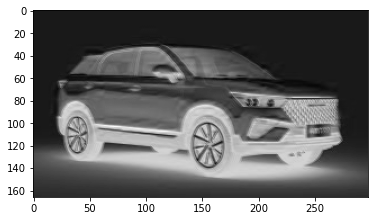

In [21]:
img = read_img(car_img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=10, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 168, 300, 10)      280       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________
(1, 168, 300, 10)


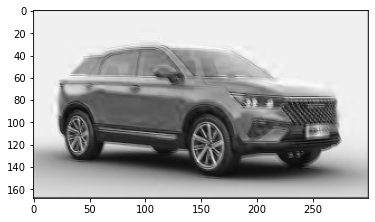

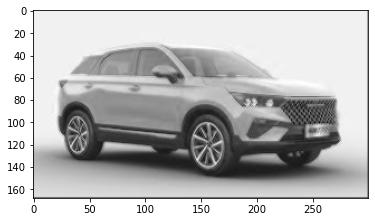

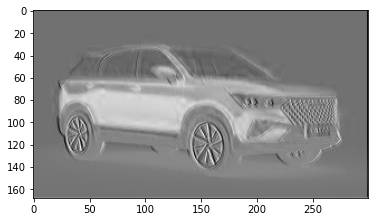

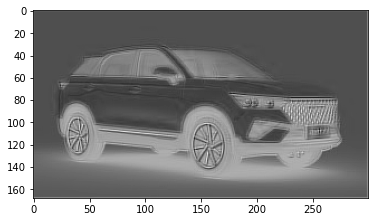

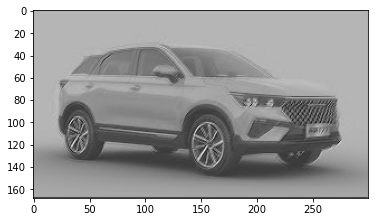

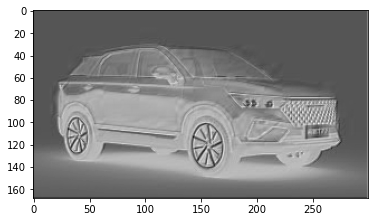

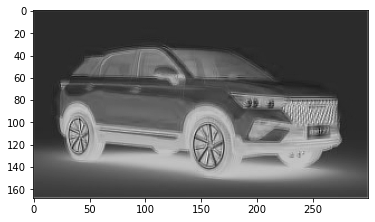

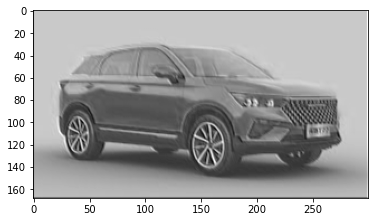

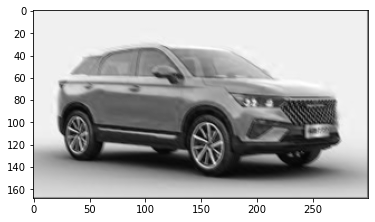

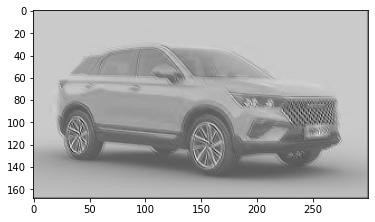

In [22]:
img = read_img(car_img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=10, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:], padding="same")
apply_conv_model_and_visualize(input_img, model)

In [23]:

def max_pooling(img, pool_size=(2,2), strides=(2,2)):
    reshaped_img = reshaping_in(img)
    pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
    result = pooling_layer(reshaped_img)
    return result

(168, 300)
(1, 84, 150, 1)


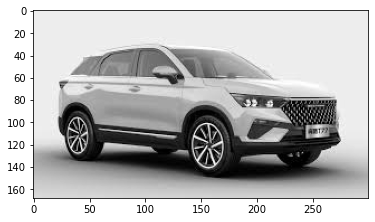

In [24]:
img = read_img(car_img_path)
print(img.shape)
result = max_pooling(img)
print(result.shape)


In [25]:
def plot_pooling(result):
    _, row, col, _ = result.shape
    reshape = tf.reshape(result, (row, col))
    plt.imshow(reshape, cmap="gray")

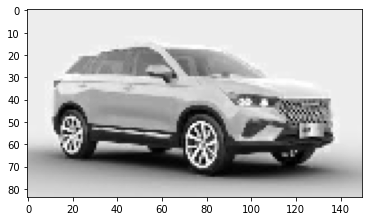

In [26]:
plot_pooling(result)

In [27]:
_, row, col, _ = result.shape
reshape = tf.reshape(result, (row, col))

In [28]:
result = max_pooling(reshape.numpy())
print(result.shape)

(1, 42, 75, 1)


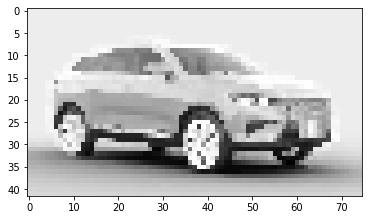

In [29]:
plot_pooling(result)


# GlobalAvgPool2D

In [30]:
def global_avg_pooling(img, grayscale):
    reshaped_img = reshaping_in(img, grayscale)
    pooling_layer = tf.keras.layers.GlobalAvgPool2D()
    result = pooling_layer(reshaped_img)
    return result

(168, 300, 3)
(1, 3)
tf.Tensor([[153 166 174]], shape=(1, 3), dtype=uint8)


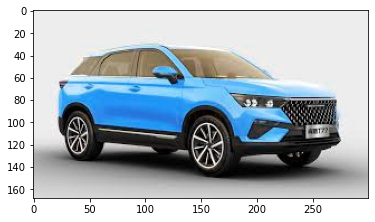

In [31]:
img = read_img(car_img_path, grayscale=False)
print(img.shape)
result = global_avg_pooling(img, grayscale=False)
print(result.shape)
print(result)